## Smart Agriculture Analytics and Crop Yield Forecasting using Multi-Domain Data

In [2]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
crop=pd.read_csv("crop_production.csv")

In [13]:
crop

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [14]:
crop.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [15]:
crop.tail()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0
246090,West Bengal,PURULIA,2014,Winter,Sesamum,175.0,88.0


In [16]:
crop.shape

(246091, 7)

In [17]:
crop.columns.tolist()

['State_Name',
 'District_Name',
 'Crop_Year',
 'Season',
 'Crop',
 'Area',
 'Production']

In [18]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [19]:
crop.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [20]:
crop.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [21]:
crop[crop['Production'].isnull()]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
46,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Arecanut,795.67,NaN
51,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Dry chillies,17.00,NaN
623,Andhra Pradesh,ANANTAPUR,2007,Kharif,Moong(Green Gram),1000.00,NaN
630,Andhra Pradesh,ANANTAPUR,2007,Rabi,Horse-gram,1000.00,NaN
698,Andhra Pradesh,ANANTAPUR,2009,Rabi,Rapeseed &Mustard,8.00,NaN
...,...,...,...,...,...,...,...
244128,West Bengal,MEDINIPUR WEST,2010,Rabi,Peas & beans (Pulses),2.00,NaN
244581,West Bengal,MURSHIDABAD,2006,Kharif,Moong(Green Gram),200.00,NaN
245606,West Bengal,PURULIA,2001,Rabi,Rapeseed &Mustard,427.00,NaN
245644,West Bengal,PURULIA,2002,Rabi,Rapeseed &Mustard,522.00,NaN


In [22]:
crop['Production'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 246091 entries, 0 to 246090
Series name: Production
Non-Null Count   Dtype  
--------------   -----  
242361 non-null  float64
dtypes: float64(1)
memory usage: 1.9 MB


In [23]:
missing_prod=crop[crop['Production'].isnull()]

In [24]:
missing_prod.shape[0]

3730

In [25]:
## Missing production by crop

print(missing_prod['Crop'].value_counts().head(10))

Crop
Sesamum                225
Sannhamp               212
Moong(Green Gram)      212
Maize                  160
Urad                   140
Cotton(lint)           136
Gram                   134
Other Kharif pulses    110
Castor seed            106
Arhar/Tur              102
Name: count, dtype: int64


In [26]:
## Missing production by state

print(missing_prod['State_Name'].value_counts().head(10))

State_Name
Haryana           1335
Rajasthan          448
Chhattisgarh       341
Madhya Pradesh     339
Tamil Nadu         281
Kerala             258
Maharashtra        132
Uttar Pradesh      117
Gujarat             71
Uttarakhand         71
Name: count, dtype: int64


In [27]:
## filling NAN

crop_mean=crop.groupby('Crop')['Production'].transform('mean')

In [28]:
crop['Production']=crop['Production'].fillna(crop_mean)

In [29]:
crop['Production'].isnull().sum()

np.int64(0)

In [30]:
crop[crop['Production'].isnull()]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production


In [31]:
crop['Production'].describe()


count    2.460910e+05
mean     5.814033e+05
std      1.695015e+07
min      0.000000e+00
25%      9.100000e+01
50%      7.710000e+02
75%      7.100000e+03
max      1.250800e+09
Name: Production, dtype: float64

In [32]:
crop['Area'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 246091 entries, 0 to 246090
Series name: Area
Non-Null Count   Dtype  
--------------   -----  
246091 non-null  float64
dtypes: float64(1)
memory usage: 1.9 MB


In [33]:
crop['Area'].isnull().sum()

np.int64(0)

In [34]:
crop['Area']=pd.to_numeric(crop['Area'],errors='coerce')

In [35]:
crop_mean_area=crop.groupby('Crop')['Area'].transform('mean')
crop['Area']=crop['Area'].fillna(crop_mean_area)

In [36]:
## Cleaning text columns

In [37]:
crop['State_Name']

0         Andaman and Nicobar Islands
1         Andaman and Nicobar Islands
2         Andaman and Nicobar Islands
3         Andaman and Nicobar Islands
4         Andaman and Nicobar Islands
                     ...             
246086                    West Bengal
246087                    West Bengal
246088                    West Bengal
246089                    West Bengal
246090                    West Bengal
Name: State_Name, Length: 246091, dtype: object

In [38]:
text_cols=['State_Name','District_Name','Crop']

In [39]:
for col in text_cols:
    crop[col]=crop[col].astype(str).str.strip().str.title()

In [40]:
print("unique_States:",len(crop['State_Name'].unique()))

unique_States: 33


In [41]:
print("unique_District:",len(crop['District_Name'].unique()))
print("unique_Crops:",len(crop['Crop'].unique()))

unique_District: 646
unique_Crops: 124


In [42]:
print(crop['Crop'].unique()[:20])

['Arecanut' 'Other Kharif Pulses' 'Rice' 'Banana' 'Cashewnut' 'Coconut'
 'Dry Ginger' 'Sugarcane' 'Sweet Potato' 'Tapioca' 'Black Pepper'
 'Dry Chillies' 'Other Oilseeds' 'Turmeric' 'Maize' 'Moong(Green Gram)'
 'Urad' 'Arhar/Tur' 'Groundnut' 'Sunflower']


In [43]:
crop.duplicated().sum()

np.int64(0)

In [44]:
crop[crop.duplicated()]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production


In [45]:
## No duplicates still droping ....

In [46]:
crop.drop_duplicates(inplace=True)

In [47]:
crop.shape

(246091, 7)

In [48]:
import os

In [49]:
os.makedirs("data/process",exist_ok=True)
crop.to_csv("data/process/crop_clean.csv",index=False)
print("cleaned csv")

cleaned csv


In [51]:
crop

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman And Nicobar Islands,Nicobars,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman And Nicobar Islands,Nicobars,2000,Kharif,Other Kharif Pulses,2.0,1.0
2,Andaman And Nicobar Islands,Nicobars,2000,Kharif,Rice,102.0,321.0
3,Andaman And Nicobar Islands,Nicobars,2000,Whole Year,Banana,176.0,641.0
4,Andaman And Nicobar Islands,Nicobars,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,Purulia,2014,Summer,Rice,306.0,801.0
246087,West Bengal,Purulia,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,Purulia,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,Purulia,2014,Winter,Rice,279151.0,597899.0


C:\Users\kunal\AppData\Local\Temp\ipykernel_4036\1387514624.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_yield.values, y=top_yield.index, palette='viridis')


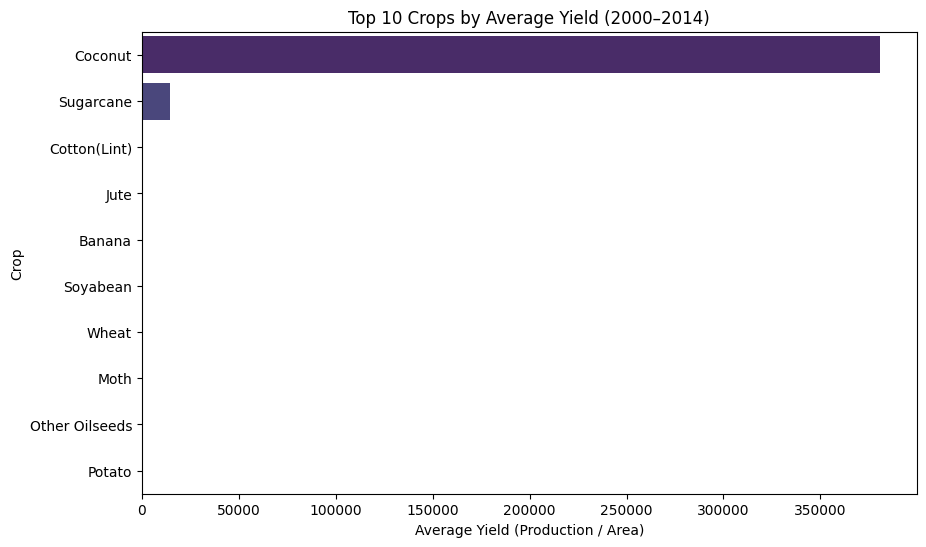

In [75]:
## Top 10 Crops by Average Yield (Production per Hectare)

crop['Yield'] = crop['Production'] / crop['Area']
top_yield = crop.groupby('Crop')['Yield'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_yield.values, y=top_yield.index, palette='viridis')
plt.title('Top 10 Crops by Average Yield (2000–2014)')
plt.xlabel('Average Yield (Production / Area)')
plt.ylabel('Crop')
plt.show()


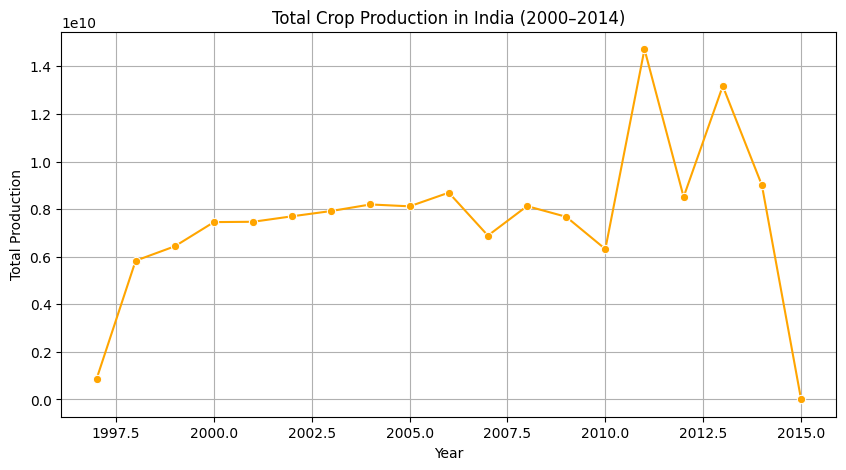

In [77]:
## Yearly Production Trend Across India

yearly_prod = crop.groupby('Crop_Year')['Production'].sum()
plt.figure(figsize=(10,5))
sns.lineplot(x=yearly_prod.index, y=yearly_prod.values, marker='o', color='orange')
plt.title('Total Crop Production in India (2000–2014)')
plt.xlabel('Year')
plt.ylabel('Total Production')
plt.grid(True)
plt.show()


## 2 nd csv file

In [3]:
W=pd.read_csv('weather.csv')

In [4]:
W.head()

,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN And NICOBAR ISLANDS,NICOBAR,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,2805.2,165.2,540.7,1207.2,892.1
1,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,3015.7,69.7,483.5,1757.2,705.3
2,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,454.8,276.1,198.6,100.0,2913.3,48.6,405.6,1884.4,574.7
3,ARUNACHAL PRADESH,LOHIT,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,313.6,167.1,34.1,29.8,3043.8,123.0,841.3,1848.5,231.0
4,ARUNACHAL PRADESH,EAST SIANG,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,568.0,206.9,29.5,31.7,4034.7,112.8,645.4,3008.4,268.1


In [5]:
W.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   STATE_UT_NAME  641 non-null    object 
 1   DISTRICT       641 non-null    object 
 2   JAN            641 non-null    float64
 3   FEB            641 non-null    float64
 4   MAR            641 non-null    float64
 5   APR            641 non-null    float64
 6   MAY            641 non-null    float64
 7   JUN            641 non-null    float64
 8   JUL            641 non-null    float64
 9   AUG            641 non-null    float64
 10  SEP            641 non-null    float64
 11  OCT            641 non-null    float64
 12  NOV            641 non-null    float64
 13  DEC            641 non-null    float64
 14  ANNUAL         641 non-null    float64
 15  Jan-Feb        641 non-null    float64
 16  Mar-May        641 non-null    float64
 17  Jun-Sep        641 non-null    float64
 18  Oct-Dec   

In [6]:
W.shape

(641, 19)

In [7]:
W.describe()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.00000,641.000000
mean,18.355070,20.984399,30.034789,45.543214,81.535101,196.007332,326.033697,291.152262,194.609048,90.446334,34.117473,18.150858,1346.969579,39.339470,157.113105,1007.80234,142.714665
std,21.082806,27.729596,45.451082,71.556279,111.960390,196.556284,221.364643,152.647325,99.830540,74.990685,59.371274,32.711009,838.878874,47.212773,213.445888,629.33261,148.951752
min,0.000000,0.000000,0.000000,0.000000,0.900000,3.800000,11.600000,14.100000,8.600000,3.100000,1.200000,0.000000,94.600000,0.000000,1.500000,39.60000,5.600000
25%,6.900000,7.000000,7.000000,5.000000,12.100000,68.800000,206.400000,194.600000,128.800000,34.300000,6.600000,5.300000,830.400000,14.700000,27.800000,625.40000,51.600000
50%,13.300000,12.300000,12.700000,15.100000,33.900000,131.900000,293.700000,284.800000,181.300000,62.600000,12.900000,7.900000,1116.200000,27.700000,67.200000,896.60000,86.700000
75%,19.200000,24.100000,33.200000,48.300000,91.900000,226.600000,374.800000,358.100000,234.100000,130.200000,32.300000,14.900000,1530.900000,41.100000,172.400000,1193.80000,175.200000
max,144.500000,229.600000,367.900000,554.400000,733.700000,1476.200000,1820.900000,1522.100000,826.300000,517.700000,475.100000,297.700000,7229.300000,335.300000,1256.500000,5228.00000,1048.500000


In [8]:
W.columns.tolist()

['STATE_UT_NAME',
 'DISTRICT',
 'JAN',
 'FEB',
 'MAR',
 'APR',
 'MAY',
 'JUN',
 'JUL',
 'AUG',
 'SEP',
 'OCT',
 'NOV',
 'DEC',
 'ANNUAL',
 'Jan-Feb',
 'Mar-May',
 'Jun-Sep',
 'Oct-Dec']

In [104]:
W.columns=[c.strip().replace(" ","_").title() for c in W.columns]

In [105]:
W

,Statenutnname,District,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,...,Oct,Nov,Dec,Annual,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,Rainfall_Rabi,Rainfall_Kharif
0,ANDAMAN And NICOBAR ISLANDS,NICOBAR,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,...,326.0,315.2,250.9,2805.2,165.2,540.7,1207.2,892.1,806.4,1207.2
1,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,...,301.2,275.8,128.3,3015.7,69.7,483.5,1757.2,705.3,646.7,1757.2
2,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,...,276.1,198.6,100.0,2913.3,48.6,405.6,1884.4,574.7,523.3,1884.4
3,ARUNACHAL PRADESH,LOHIT,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,...,167.1,34.1,29.8,3043.8,123.0,841.3,1848.5,231.0,324.2,1848.5
4,ARUNACHAL PRADESH,EAST SIANG,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,...,206.9,29.5,31.7,4034.7,112.8,645.4,3008.4,268.1,349.2,3008.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,KERALA,IDUKKI,13.4,22.1,43.6,150.4,232.6,651.6,788.9,527.3,...,343.2,172.9,48.1,3302.5,35.5,426.6,2276.2,564.2,551.6,2276.2
637,KERALA,KASARGOD,2.3,1.0,8.4,46.9,217.6,999.6,1108.5,636.3,...,234.9,84.6,18.4,3621.6,3.3,272.9,3007.5,337.9,322.8,3007.5
638,KERALA,PATHANAMTHITTA,19.8,45.2,73.9,184.9,294.7,556.9,539.9,352.7,...,359.4,213.5,51.3,2958.4,65.0,553.5,1715.7,624.2,637.9,1715.7
639,KERALA,WAYANAD,4.8,8.3,17.5,83.3,174.6,698.1,1110.4,592.9,...,213.1,93.6,25.8,3253.1,13.1,275.4,2632.1,332.5,319.8,2632.1


In [89]:
W.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
636    False
637    False
638    False
639    False
640    False
Length: 641, dtype: bool

In [94]:
W.head()

,Statenutnname,District,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN And NICOBAR ISLANDS,NICOBAR,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,2805.2,165.2,540.7,1207.2,892.1
1,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,3015.7,69.7,483.5,1757.2,705.3
2,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,454.8,276.1,198.6,100.0,2913.3,48.6,405.6,1884.4,574.7
3,ARUNACHAL PRADESH,LOHIT,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,313.6,167.1,34.1,29.8,3043.8,123.0,841.3,1848.5,231.0
4,ARUNACHAL PRADESH,EAST SIANG,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,568.0,206.9,29.5,31.7,4034.7,112.8,645.4,3008.4,268.1


In [91]:
## Too much columns so we will merge all the month column as kharif and rabi

In [93]:
W.columns=[c.strip().replace("_","n").title() for c in W.columns]

In [98]:
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [99]:
for m in months:
    W[m]=pd.to_numeric(W[m].astype(str).str.replace(',',''),errors='coerce')

In [101]:
W['Rainfall_Rabi']=W[['Oct','Nov','Jan','Feb']].sum(axis=1,skipna=True)

In [102]:
W['Rainfall_Kharif']=W[['Jun','Jul','Aug','Sep']].sum(axis=1,skipna=True)

In [107]:
W.rename(columns={'Statenutnname': 'States_&_UT'}, inplace=True)

In [109]:
W.rename(columns={'Annual': 'Annual_Kharif'}, inplace=True)

In [113]:
W.head()

,States_&_UT,District,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,...,Oct,Nov,Dec,Annual_Kharif,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,Rainfall_Rabi,Rainfall_Kharif
0,ANDAMAN And NICOBAR ISLANDS,NICOBAR,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,...,326.0,315.2,250.9,2805.2,165.2,540.7,1207.2,892.1,806.4,1207.2
1,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,...,301.2,275.8,128.3,3015.7,69.7,483.5,1757.2,705.3,646.7,1757.2
2,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,...,276.1,198.6,100.0,2913.3,48.6,405.6,1884.4,574.7,523.3,1884.4
3,ARUNACHAL PRADESH,LOHIT,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,...,167.1,34.1,29.8,3043.8,123.0,841.3,1848.5,231.0,324.2,1848.5
4,ARUNACHAL PRADESH,EAST SIANG,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,...,206.9,29.5,31.7,4034.7,112.8,645.4,3008.4,268.1,349.2,3008.4


In [114]:
W=W[['States_&_UT','District','Rainfall_Rabi','Rainfall_Kharif','Annual_Kharif']]

In [115]:
W.head()

,States_&_UT,District,Rainfall_Rabi,Rainfall_Kharif,Annual_Kharif
0,ANDAMAN And NICOBAR ISLANDS,NICOBAR,806.4,1207.2,2805.2
1,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,646.7,1757.2,3015.7
2,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,523.3,1884.4,2913.3
3,ARUNACHAL PRADESH,LOHIT,324.2,1848.5,3043.8
4,ARUNACHAL PRADESH,EAST SIANG,349.2,3008.4,4034.7


In [118]:
os.makedirs("data\processed",exist_ok=True)
W.to_csv("data/processed/W_clean.csv",index=True)
print("saved file")

saved file


<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\kunal\AppData\Local\Temp\ipykernel_4036\3399345080.py:1: SyntaxWarning: invalid escape sequence '\p'
  os.makedirs("data\processed",exist_ok=True)


In [1]:
## 3 rd CSV

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
soil=pd.read_csv('soil.csv')

In [4]:
soil.head()

,District,Zn %,Fe%,Cu %,Mn %,B %,S %
0,Anantapur,67.67,65.14,91.88,77.70,73.54,85.90
1,Chittoor,80.51,78.19,99.77,91.82,89.04,88.62
2,East Godavari,79.27,88.14,95.54,97.24,88.05,95.67
3,Guntur,58.30,71.16,98.86,91.40,86.15,86.81
4,Krishna,78.62,82.02,98.05,95.23,65.78,98.56


In [5]:
soil.shape

(673, 7)

In [7]:
soil.describe()

,Zn %,Fe%,Cu %,Mn %,B %,S %
count,658.000000,655.000000,651.000000,651.000000,608.000000,663.000000
mean,64.872903,72.827588,91.029462,82.221014,55.212023,67.816742
std,25.647855,28.440631,17.837458,22.567301,32.710293,30.352083
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.555000,56.920000,91.805000,76.020000,29.892500,48.455000
50%,68.560000,82.100000,96.900000,90.910000,62.010000,78.510000
75%,86.275000,97.145000,99.250000,97.715000,82.282500,91.610000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [9]:
soil.isnull().sum()

District      0
Zn %         15
Fe%          18
Cu %         22
Mn %         22
B %          65
S %          10
dtype: int64

In [20]:
soil.columns.tolist()

['District ', 'Zn %', 'Fe%', 'Cu %', 'Mn %', 'B %', 'S %']

In [25]:
soil.columns = soil.columns.str.replace('%', '', regex=False).str.strip()

In [26]:
soil.columns.tolist()

['District', 'Zn', 'Fe', 'Cu', 'Mn', 'B', 'S']

In [29]:
soil['Zn'].fillna(soil['Zn'].mean(), inplace=True)

C:\Users\kunal\AppData\Local\Temp\ipykernel_24176\735927606.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  soil['Zn'].fillna(soil['Zn'].mean(), inplace=True)


In [30]:
soil.isnull().sum()

District     0
Zn           0
Fe          18
Cu          22
Mn          22
B           65
S           10
dtype: int64

In [31]:
soil['Fe'].fillna(soil['Fe'].mean(), inplace=True)
soil['Cu'].fillna(soil['Cu'].mean(), inplace=True)
soil['Mn'].fillna(soil['Mn'].mean(), inplace=True)
soil['B'].fillna(soil['B'].mean(), inplace=True)
soil['S'].fillna(soil['S'].mean(), inplace=True)

C:\Users\kunal\AppData\Local\Temp\ipykernel_24176\2405520627.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  soil['Fe'].fillna(soil['Fe'].mean(), inplace=True)
C:\Users\kunal\AppData\Local\Temp\ipykernel_24176\2405520627.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [32]:
soil.isnull().sum()

District    0
Zn          0
Fe          0
Cu          0
Mn          0
B           0
S           0
dtype: int64

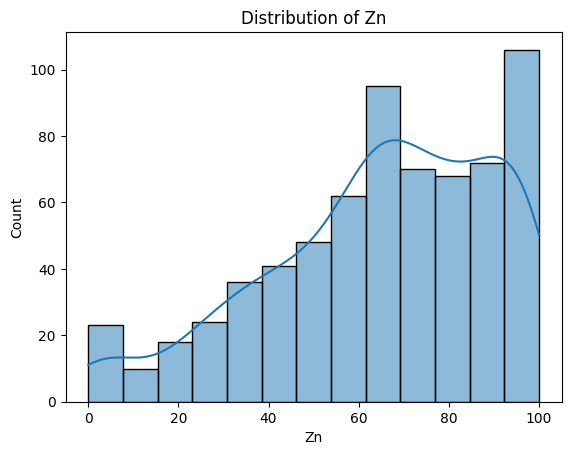

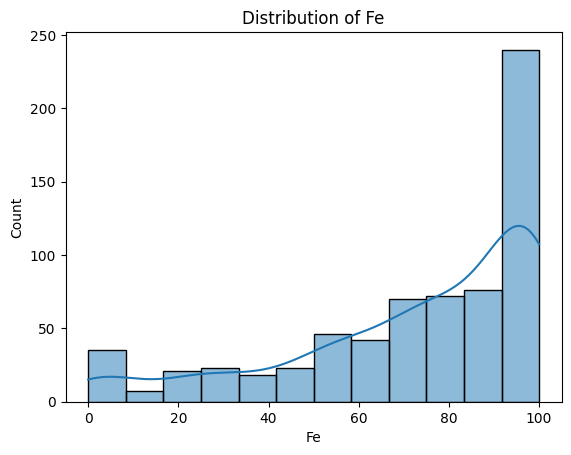

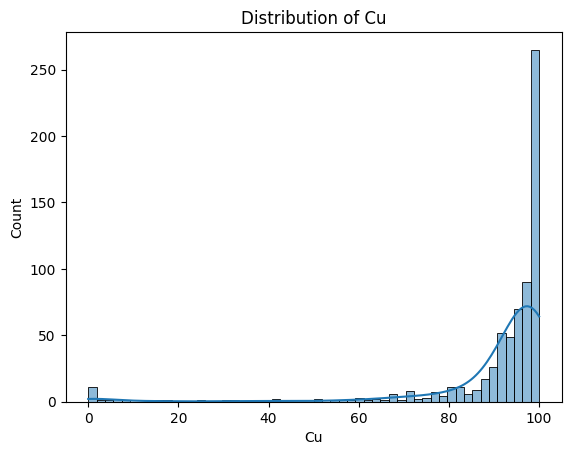

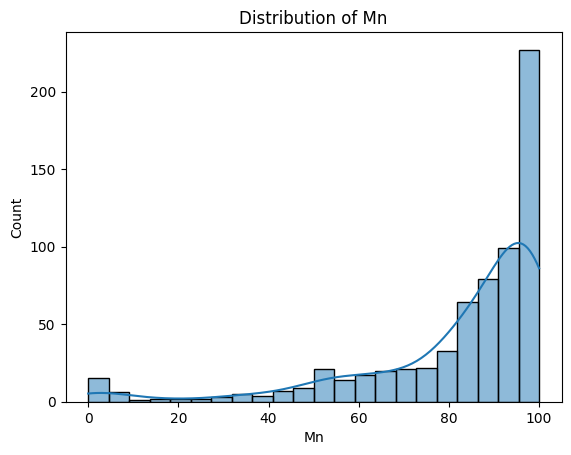

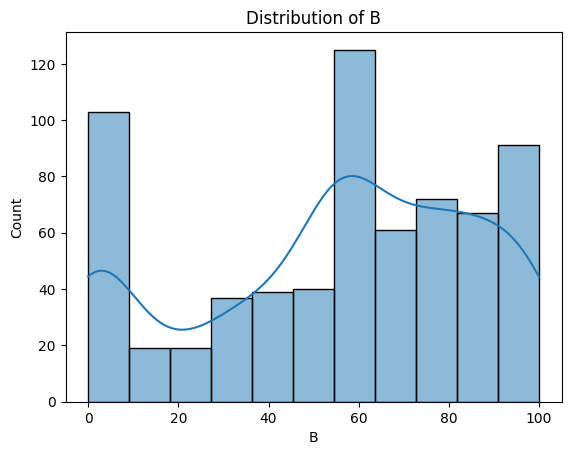

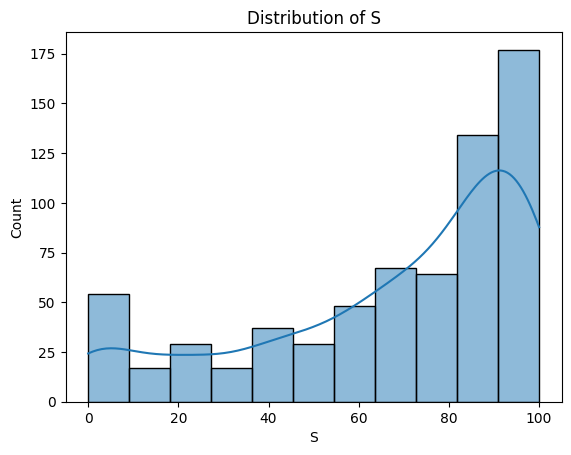

In [33]:

for col in ['Zn','Fe','Cu','Mn','B','S']:
    sns.histplot(soil[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


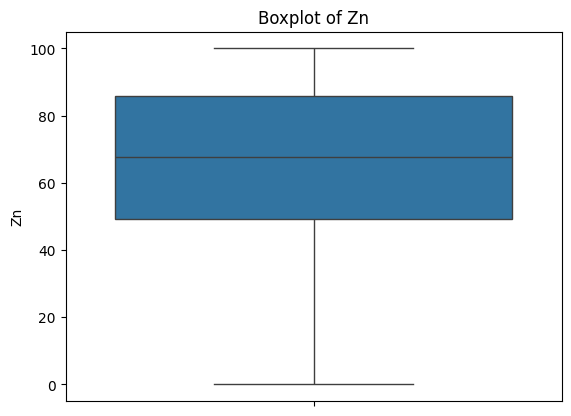

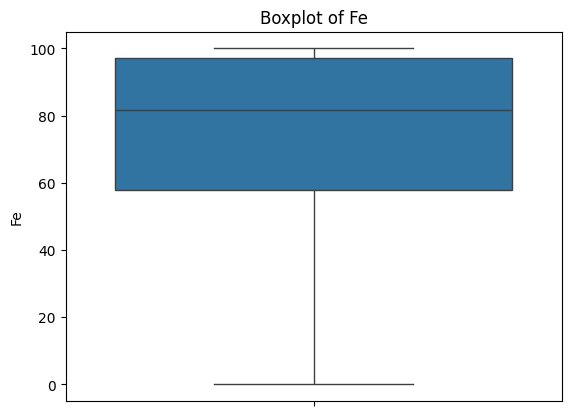

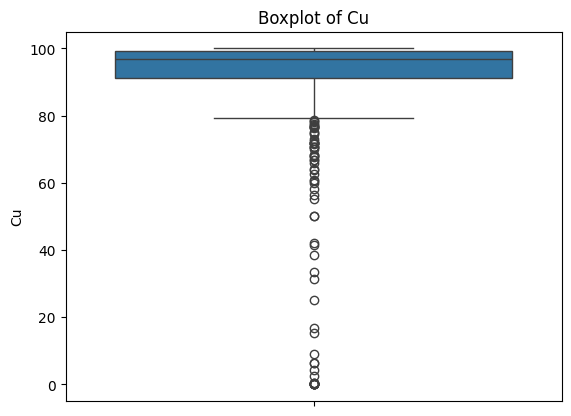

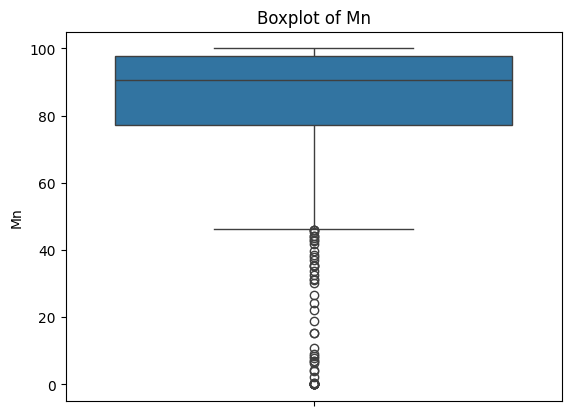

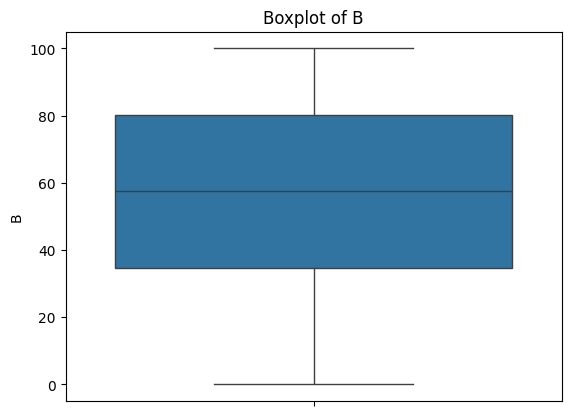

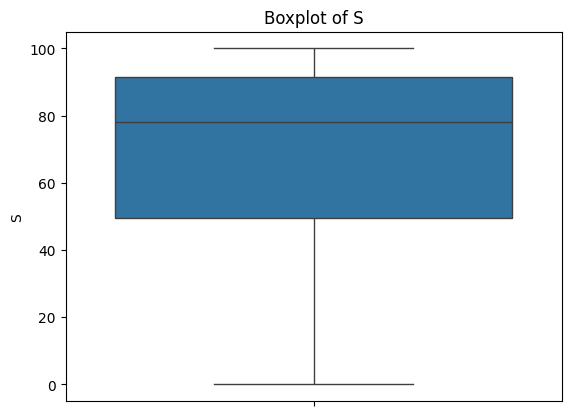

In [34]:
for col in ['Zn','Fe','Cu','Mn','B','S']:
    sns.boxplot(soil[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [36]:
Q1 = soil['Cu'].quantile(0.25)
Q3 = soil['Cu'].quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q3, IQR)


91.02946236559139 99.18 8.150537634408622


In [38]:
soil[(soil['Cu'] < (Q1 - 1.5*IQR)) | (soil['Cu'] > (Q3 + 1.5*IQR))]


,District,Zn,Fe,Cu,Mn,B,S
17,Changlang,0.00,100.00,66.67,100.00,55.212023,100.00
19,East Kameng,67.76,99.80,71.78,45.95,55.212023,7.96
21,Kra Daadi,44.44,88.89,25.00,100.00,33.330000,66.67
25,Lower Subansiri,50.00,100.00,50.00,100.00,0.000000,0.00
31,Upper Subansiri,41.80,100.00,60.58,53.48,55.212023,0.26
...,...,...,...,...,...,...,...
570,Diu,46.67,10.67,67.57,56.34,37.330000,82.67
586,Ayodhya,57.91,4.17,70.56,35.32,56.780000,75.64
630,Mahoba,34.98,10.29,70.66,47.68,21.930000,72.08
654,Almora,97.83,92.94,72.42,96.45,88.710000,96.15


In [39]:
soil.describe()

,Zn,Fe,Cu,Mn,B,S
count,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000
mean,64.872903,72.827588,91.029462,82.221014,55.212023,67.816742
std,25.359991,28.057145,17.543046,22.194822,31.088097,30.125402
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49.300000,57.850000,91.029462,77.060000,34.540000,49.620000
50%,67.760000,81.560000,96.740000,90.430000,57.660000,78.020000
75%,85.730000,97.070000,99.180000,97.580000,80.090000,91.460000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [40]:
soil['Cu'] = np.log1p(soil['Cu'])
soil['Mn'] = np.log1p(soil['Mn'])


In [41]:
soil.describe()

,Zn,Fe,Cu,Mn,B,S
count,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000
mean,64.872903,72.827588,4.442926,4.311960,55.212023,67.816742
std,25.359991,28.057145,0.626126,0.691257,31.088097,30.125402
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49.300000,57.850000,4.522109,4.357478,34.540000,49.620000
50%,67.760000,81.560000,4.582311,4.515574,57.660000,78.020000
75%,85.730000,97.070000,4.606969,4.590868,80.090000,91.460000
max,100.000000,100.000000,4.615121,4.615121,100.000000,100.000000


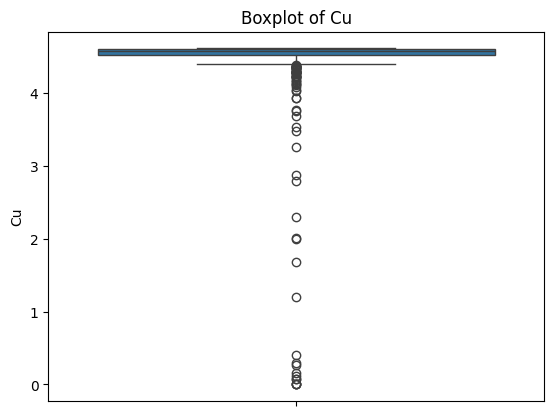

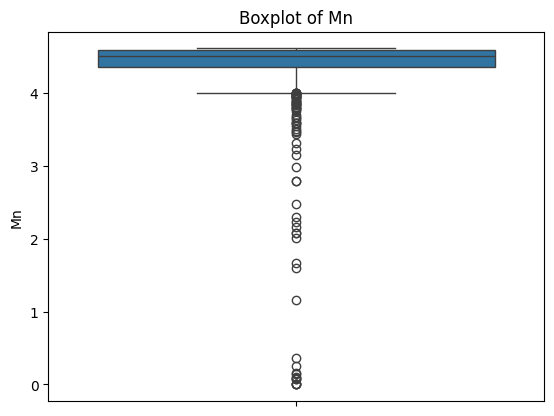

In [42]:
for col in ['Cu','Mn']:
    sns.boxplot(soil[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [43]:
soil['Cu'] = np.expm1(soil['Cu'])
soil['Mn'] = np.expm1(soil['Mn'])


In [49]:
soil.describe()

,Zn,Fe,Cu,Mn,B,S
count,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000
mean,64.872903,72.827588,91.029462,82.221014,55.212023,67.816742
std,25.359991,28.057145,17.543046,22.194822,31.088097,30.125402
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49.300000,57.850000,91.029462,77.060000,34.540000,49.620000
50%,67.760000,81.560000,96.740000,90.430000,57.660000,78.020000
75%,85.730000,97.070000,99.180000,97.580000,80.090000,91.460000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [50]:
soil.head()

,District,Zn,Fe,Cu,Mn,B,S
0,Anantapur,67.67,65.14,91.88,77.70,73.54,85.90
1,Chittoor,80.51,78.19,99.77,91.82,89.04,88.62
2,East Godavari,79.27,88.14,95.54,97.24,88.05,95.67
3,Guntur,58.30,71.16,98.86,91.40,86.15,86.81
4,Krishna,78.62,82.02,98.05,95.23,65.78,98.56


In [52]:
numeric_cols = ['Zn', 'Fe', 'Cu', 'Mn', 'B', 'S'] 
soil[numeric_cols] = soil[numeric_cols].round(2)


In [53]:
soil.tail()

,District,Zn,Fe,Cu,Mn,B,S
668,Birbhum,93.95,100.00,98.63,97.06,78.52,22.07
669,KALIMPONG,100.00,100.00,100.00,84.81,100.00,62.50
670,Maldah,98.56,93.78,97.61,68.60,81.34,44.98
671,Murshidabad,96.36,99.59,100.00,94.31,87.85,36.84
672,Nadia,86.96,97.83,100.00,77.17,71.74,22.83


In [54]:
soil['District'] = soil['District'].str.lower().str.strip()


In [55]:
soil.head()

,District,Zn,Fe,Cu,Mn,B,S
0,anantapur,67.67,65.14,91.88,77.70,73.54,85.90
1,chittoor,80.51,78.19,99.77,91.82,89.04,88.62
2,east godavari,79.27,88.14,95.54,97.24,88.05,95.67
3,guntur,58.30,71.16,98.86,91.40,86.15,86.81
4,krishna,78.62,82.02,98.05,95.23,65.78,98.56


In [56]:
soil.to_csv('data/process/soil_clean.csv',index=False)

In [57]:
## 4 Th csv file

In [59]:
F=pd.read_csv('fertiliser.csv')

In [61]:
F.head()

,sector,state,city,company,manufacturing_unit,fertiliser_type,fy_2014_15,fy_2015_16,fy_2016_17,fy_2017_18,fy_2018_19,fy_2019_20,fy_2020_21,fy_2021_22,fy_2022_23,fy_2023_24,fy_2024_25
0,public,Haryana,panipat,National Fertilizes Ltd.,National Fertilizers Ltd Panipat,Urea,5.12,5.67,5.43,5.60,5.74,5.52,5.83,4.69,5.70,5.30,4.56
1,public,Madhya Pradesh,vijaipur,National Fertilizes Ltd.,National Fertilizers Ltd Vijaipur-I,Urea,9.51,9.90,10.58,10.44,10.29,9.84,9.66,10.41,10.50,10.43,8.84
2,public,Madhya Pradesh,vijaipur,National Fertilizes Ltd.,National Fertilizers Ltd Vijaipur-II,Urea,11.38,11.46,11.39,10.88,11.32,10.53,11.27,9.55,11.87,11.24,10.60
3,public,Punjab,nangal,National Fertilizes Ltd.,National FertilizersLtd Nangal-II,Urea,4.79,5.46,5.02,5.43,5.41,5.75,5.47,5.32,5.45,5.21,4.88
4,public,Punjab,bhatinda,National Fertilizes Ltd.,NationalFertilizers Ltd Bhatinda,Urea,5.61,5.48,5.68,5.63,5.84,5.63,5.77,5.29,5.82,4.72,4.98


In [62]:
F.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sector              55 non-null     object 
 1   state               55 non-null     object 
 2   city                55 non-null     object 
 3   company             55 non-null     object 
 4   manufacturing_unit  55 non-null     object 
 5   fertiliser_type     55 non-null     object 
 6   fy_2014_15          44 non-null     float64
 7   fy_2015_16          44 non-null     float64
 8   fy_2016_17          44 non-null     float64
 9   fy_2017_18          42 non-null     float64
 10  fy_2018_19          42 non-null     float64
 11  fy_2019_20          43 non-null     float64
 12  fy_2020_21          45 non-null     float64
 13  fy_2021_22          45 non-null     float64
 14  fy_2022_23          50 non-null     float64
 15  fy_2023_24          51 non-null     float64
 16  fy_2024_25

In [63]:
F.shape

(55, 17)

In [64]:
F.describe()

,fy_2014_15,fy_2015_16,fy_2016_17,fy_2017_18,fy_2018_19,fy_2019_20,fy_2020_21,fy_2021_22,fy_2022_23,fy_2023_24,fy_2024_25
count,44.000000,44.000000,44.000000,42.000000,42.000000,43.000000,45.000000,45.000000,50.00000,51.000000,53.000000
mean,7.796136,8.403636,8.414773,8.911190,8.798095,8.853256,8.539556,8.502889,8.57720,8.998627,8.090377
std,5.048375,5.382140,5.466882,5.004548,4.989528,5.415837,5.440689,5.248400,5.67537,5.336654,5.600340
min,0.000000,0.000000,0.000000,0.110000,1.960000,0.030000,0.000000,0.380000,0.01000,0.020000,0.000000
25%,4.165000,4.642500,4.997500,5.607500,5.147500,5.510000,5.470000,5.280000,5.16500,5.220000,4.560000
50%,6.485000,7.375000,7.555000,8.320000,7.615000,7.500000,7.930000,6.810000,7.64000,8.790000,7.630000
75%,10.282500,10.990000,10.607500,10.852500,11.295000,10.815000,11.040000,10.770000,11.36500,11.540000,10.810000
max,22.250000,22.680000,25.050000,22.540000,23.420000,23.310000,23.230000,23.400000,24.87000,23.350000,22.240000


In [65]:
F.isnull().sum()

sector                 0
state                  0
city                   0
company                0
manufacturing_unit     0
fertiliser_type        0
fy_2014_15            11
fy_2015_16            11
fy_2016_17            11
fy_2017_18            13
fy_2018_19            13
fy_2019_20            12
fy_2020_21            10
fy_2021_22            10
fy_2022_23             5
fy_2023_24             4
fy_2024_25             2
dtype: int64

In [66]:
F

,sector,state,city,company,manufacturing_unit,fertiliser_type,fy_2014_15,fy_2015_16,fy_2016_17,fy_2017_18,fy_2018_19,fy_2019_20,fy_2020_21,fy_2021_22,fy_2022_23,fy_2023_24,fy_2024_25
0,public,Haryana,panipat,National Fertilizes Ltd.,National Fertilizers Ltd Panipat,Urea,5.12,5.67,5.43,5.60,5.74,5.52,5.83,4.69,5.70,5.30,4.56
1,public,Madhya Pradesh,vijaipur,National Fertilizes Ltd.,National Fertilizers Ltd Vijaipur-I,Urea,9.51,9.90,10.58,10.44,10.29,9.84,9.66,10.41,10.50,10.43,8.84
2,public,Madhya Pradesh,vijaipur,National Fertilizes Ltd.,National Fertilizers Ltd Vijaipur-II,Urea,11.38,11.46,11.39,10.88,11.32,10.53,11.27,9.55,11.87,11.24,10.60
3,public,Punjab,nangal,National Fertilizes Ltd.,National FertilizersLtd Nangal-II,Urea,4.79,5.46,5.02,5.43,5.41,5.75,5.47,5.32,5.45,5.21,4.88
4,public,Punjab,bhatinda,National Fertilizes Ltd.,NationalFertilizers Ltd Bhatinda,Urea,5.61,5.48,5.68,5.63,5.84,5.63,5.77,5.29,5.82,4.72,4.98
5,public,Maharashtra,trombay,Rashtriya Chemicals & FertilizersLtd\n.,Rashtriya Chemicals & Fertilizers Ltd Trombay,Urea/\nComplexes,10.81,10.89,8.73,9.19,9.53,8.96,8.77,8.99,9.59,9.17,8.43
6,public,Maharashtra,thal,Rashtriya Chemicals & FertilizersLtd\n.,Rashtriya Chemicals & Fertilizers Ltd Thal,Urea,21.78,20.98,21.44,20.61,19.84,20.22,19.12,18.59,18.80,18.42,16.07
7,public,Assam,Namrup,BVFCL:-I,Brahmaputra Valley Fertilizers Corporation Ltd.,Urea,0.98,0.66,0.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,public,Assam,Namrup,BVFCL:- II,Brahmaputra Valley Fertilizers Corporation Ltd.,Urea,2.61,2.56,2.50,2.12,2.29,1.10,1.30,1.70,2.23,1.80,1.63
9,public,Kerala,Udyogamandal,Fertilizer and\nChemicals &\nTravancore Ltd.,Fertilizer and Chemicals &\nTravancore Ltd Ud...,Complexes,2.55,2.00,3.18,3.65,2.72,4.31,4.62,3.23,4.53,4.63,3.44


In [67]:
## Filling Null Values

In [70]:
F = F.fillna(F.mean(numeric_only=True))

In [71]:
F.isnull().sum()

sector                0
state                 0
city                  0
company               0
manufacturing_unit    0
fertiliser_type       0
fy_2014_15            0
fy_2015_16            0
fy_2016_17            0
fy_2017_18            0
fy_2018_19            0
fy_2019_20            0
fy_2020_21            0
fy_2021_22            0
fy_2022_23            0
fy_2023_24            0
fy_2024_25            0
dtype: int64

In [75]:

F['fertiliser_type']=F['fertiliser_type'].str.replace('\n', '', regex=True).str.strip()


In [77]:
F.head()

,sector,state,city,company,manufacturing_unit,fertiliser_type,fy_2014_15,fy_2015_16,fy_2016_17,fy_2017_18,fy_2018_19,fy_2019_20,fy_2020_21,fy_2021_22,fy_2022_23,fy_2023_24,fy_2024_25
0,public,Haryana,panipat,National Fertilizes Ltd.,National Fertilizers Ltd Panipat,Urea,5.12,5.67,5.43,5.60,5.74,5.52,5.83,4.69,5.70,5.30,4.56
1,public,Madhya Pradesh,vijaipur,National Fertilizes Ltd.,National Fertilizers Ltd Vijaipur-I,Urea,9.51,9.90,10.58,10.44,10.29,9.84,9.66,10.41,10.50,10.43,8.84
2,public,Madhya Pradesh,vijaipur,National Fertilizes Ltd.,National Fertilizers Ltd Vijaipur-II,Urea,11.38,11.46,11.39,10.88,11.32,10.53,11.27,9.55,11.87,11.24,10.60
3,public,Punjab,nangal,National Fertilizes Ltd.,National FertilizersLtd Nangal-II,Urea,4.79,5.46,5.02,5.43,5.41,5.75,5.47,5.32,5.45,5.21,4.88
4,public,Punjab,bhatinda,National Fertilizes Ltd.,NationalFertilizers Ltd Bhatinda,Urea,5.61,5.48,5.68,5.63,5.84,5.63,5.77,5.29,5.82,4.72,4.98


In [79]:
print(F['fertiliser_type'].unique())


['Urea' 'Urea/Complexes' 'Complexes' 'Urea&Complexes' 'DAP & Complexes'
 'Urea, DAP &Complexes' 'Urea &Complexes' 'DAP& Complexes' 'TSP'
 'Urea,DAP&Complexes' 'TSP & Complex' 'DAP']


In [81]:
F['fertiliser_type'] = F['fertiliser_type'].str.replace('/', ' & ')


In [82]:
print(F['fertiliser_type'].unique())

['Urea' 'Urea & Complexes' 'Complexes' 'Urea&Complexes' 'DAP & Complexes'
 'Urea, DAP &Complexes' 'Urea &Complexes' 'DAP& Complexes' 'TSP'
 'Urea,DAP&Complexes' 'TSP & Complex' 'DAP']


In [83]:
print(F['company'].unique())

['National Fertilizes Ltd.' 'Rashtriya Chemicals & FertilizersLtd\n.'
 'BVFCL:-I' 'BVFCL:- II' 'Fertilizer and\nChemicals &\nTravancore Ltd.'
 'Madras Fertilizer Ltd.' 'Indian Farmers Fertilizers Co-\nOperative Ltd.'
 'Indian Farmers Fertilizers Cooperative Ltd.'
 'Krishak Bharati Cooperative\nLtd'
 'Nagarjuna Fertilizers and Chemicals Ltd.'
 'Coromandel International Ltd.'
 'Hindustan Urvarak and Rashayan Ltd. (HURL)' 'PPL  Goa (earlier ZACL)'
 'Gujarat Narmada Valley\nFertilizers & ChemicalsLtd'
 'Gujarat State Fertilizers & Chemicals Ltd.' 'Kisan Shakti'
 'Manglore Chemicals &\nFertilizers Ltd.' 'Mahadhan Agritech Ltd Taloja'
 'Paradeep Phosphate\nLtd' 'Chambal Fertilizers and\nChemicals Ltd.'
 'Shriram Fertilizers & Chemicals Ltd' 'Patel Phoschem Ltd.'
 'Southern Petrochemicals Inds.Cor. Ltd' 'Greenstar Fertilizer Ltd.'
 'Ramagundam Fertilizers &\nChemicals Ltd.'
 'Indorama India (earlier\nGRASIM)'
 'Yara Fertilizers India\nPvt. Ltd./TCL' 'Kribhco Fertilizers Ltd.'
 'Kanpur Fertili

In [84]:

F['company'] = F['company'].str.replace('\n', ' ', regex=True)
F['company'] = F['company'].str.replace('/', ' & ', regex=False)
F['company'] = F['company'].str.replace('\s+', ' ', regex=True).str.strip()
F['company'] = F['company'].str.title()


<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\kunal\AppData\Local\Temp\ipykernel_24176\540217446.py:3: SyntaxWarning: invalid escape sequence '\s'
  F['company'] = F['company'].str.replace('\s+', ' ', regex=True).str.strip()


In [85]:
print(F['company'].unique())

['National Fertilizes Ltd.' 'Rashtriya Chemicals & Fertilizersltd .'
 'Bvfcl:-I' 'Bvfcl:- Ii' 'Fertilizer And Chemicals & Travancore Ltd.'
 'Madras Fertilizer Ltd.' 'Indian Farmers Fertilizers Co- Operative Ltd.'
 'Indian Farmers Fertilizers Cooperative Ltd.'
 'Krishak Bharati Cooperative Ltd'
 'Nagarjuna Fertilizers And Chemicals Ltd.'
 'Coromandel International Ltd.'
 'Hindustan Urvarak And Rashayan Ltd. (Hurl)' 'Ppl Goa (Earlier Zacl)'
 'Gujarat Narmada Valley Fertilizers & Chemicalsltd'
 'Gujarat State Fertilizers & Chemicals Ltd.' 'Kisan Shakti'
 'Manglore Chemicals & Fertilizers Ltd.' 'Mahadhan Agritech Ltd Taloja'
 'Paradeep Phosphate Ltd' 'Chambal Fertilizers And Chemicals Ltd.'
 'Shriram Fertilizers & Chemicals Ltd' 'Patel Phoschem Ltd.'
 'Southern Petrochemicals Inds.Cor. Ltd' 'Greenstar Fertilizer Ltd.'
 'Ramagundam Fertilizers & Chemicals Ltd.'
 'Indorama India (Earlier Grasim)'
 'Yara Fertilizers India Pvt. Ltd. & Tcl' 'Kribhco Fertilizers Ltd.'
 'Kanpur Fertilizers & Cime

In [86]:
F.head()

,sector,state,city,company,manufacturing_unit,fertiliser_type,fy_2014_15,fy_2015_16,fy_2016_17,fy_2017_18,fy_2018_19,fy_2019_20,fy_2020_21,fy_2021_22,fy_2022_23,fy_2023_24,fy_2024_25
0,public,Haryana,panipat,National Fertilizes Ltd.,National Fertilizers Ltd Panipat,Urea,5.12,5.67,5.43,5.60,5.74,5.52,5.83,4.69,5.70,5.30,4.56
1,public,Madhya Pradesh,vijaipur,National Fertilizes Ltd.,National Fertilizers Ltd Vijaipur-I,Urea,9.51,9.90,10.58,10.44,10.29,9.84,9.66,10.41,10.50,10.43,8.84
2,public,Madhya Pradesh,vijaipur,National Fertilizes Ltd.,National Fertilizers Ltd Vijaipur-II,Urea,11.38,11.46,11.39,10.88,11.32,10.53,11.27,9.55,11.87,11.24,10.60
3,public,Punjab,nangal,National Fertilizes Ltd.,National FertilizersLtd Nangal-II,Urea,4.79,5.46,5.02,5.43,5.41,5.75,5.47,5.32,5.45,5.21,4.88
4,public,Punjab,bhatinda,National Fertilizes Ltd.,NationalFertilizers Ltd Bhatinda,Urea,5.61,5.48,5.68,5.63,5.84,5.63,5.77,5.29,5.82,4.72,4.98


In [87]:
print(F['manufacturing_unit'].unique())

['National Fertilizers Ltd Panipat' 'National Fertilizers Ltd Vijaipur-I'
 'National Fertilizers Ltd Vijaipur-II'
 'National FertilizersLtd Nangal-II' 'NationalFertilizers Ltd Bhatinda'
 'Rashtriya Chemicals & Fertilizers Ltd Trombay'
 'Rashtriya Chemicals & Fertilizers Ltd Thal'
 'Brahmaputra Valley  Fertilizers Corporation Ltd.'
 'Fertilizer and Chemicals &\nTravancore Ltd  Udyogamandal'
 'Fertilizer & Chemicals\nTravancore Ltd Cochin'
 'Madras\nFertilizer Ltd Chennai'
 'Indian Farmers Fertilizers\nCo-operative Ltd. Kandla'
 'Indian Farmers Fertilizers\nCo-operativeLtd. Kalol'
 'Indian Farmers\nFertilizers Co-operativeLtd Paradeep'
 'Indian Farmers Fertilizers\nCo-operative Ltd. :Phulpur-I'
 'Indian Farmers Fertilizers\nCo-operative Ltd.:Phulpur-II'
 'Indian Farmers Fertilizers\nCo-operative Ltd.:Aonla-I'
 'Indian Farmers Fertilizers\nCo-operative Ltd.:Aonla-II'
 'Krishak Bharati Co-operative Ltd Hazira'
 'Nagarjuna Fertilizers &\nChemicals Ltd Kakinada-I'
 'Nagarjuna Fertilizers & C

In [88]:
F['manufacturing_unit'] = F['manufacturing_unit'].str.replace('\n', ' ', regex=True)
F['manufacturing_unit'] = F['manufacturing_unit'].str.replace('/', ' & ', regex=False)
F['manufacturing_unit'] = F['manufacturing_unit'].str.replace(':', ' ', regex=False)
F['manufacturing_unit'] = F['manufacturing_unit'].str.replace('\s+', ' ', regex=True).str.strip()


<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
C:\Users\kunal\AppData\Local\Temp\ipykernel_24176\2405203360.py:4: SyntaxWarning: invalid escape sequence '\s'
  F['manufacturing_unit'] = F['manufacturing_unit'].str.replace('\s+', ' ', regex=True).str.strip()


In [89]:
F

,sector,state,city,company,manufacturing_unit,fertiliser_type,fy_2014_15,fy_2015_16,fy_2016_17,fy_2017_18,fy_2018_19,fy_2019_20,fy_2020_21,fy_2021_22,fy_2022_23,fy_2023_24,fy_2024_25
0,public,Haryana,panipat,National Fertilizes Ltd.,National Fertilizers Ltd Panipat,Urea,5.120000,5.670000,5.430000,5.60000,5.740000,5.520000,5.830000,4.690000,5.7000,5.300000,4.560000
1,public,Madhya Pradesh,vijaipur,National Fertilizes Ltd.,National Fertilizers Ltd Vijaipur-I,Urea,9.510000,9.900000,10.580000,10.44000,10.290000,9.840000,9.660000,10.410000,10.5000,10.430000,8.840000
2,public,Madhya Pradesh,vijaipur,National Fertilizes Ltd.,National Fertilizers Ltd Vijaipur-II,Urea,11.380000,11.460000,11.390000,10.88000,11.320000,10.530000,11.270000,9.550000,11.8700,11.240000,10.600000
3,public,Punjab,nangal,National Fertilizes Ltd.,National FertilizersLtd Nangal-II,Urea,4.790000,5.460000,5.020000,5.43000,5.410000,5.750000,5.470000,5.320000,5.4500,5.210000,4.880000
4,public,Punjab,bhatinda,National Fertilizes Ltd.,NationalFertilizers Ltd Bhatinda,Urea,5.610000,5.480000,5.680000,5.63000,5.840000,5.630000,5.770000,5.290000,5.8200,4.720000,4.980000
5,public,Maharashtra,trombay,Rashtriya Chemicals & Fertilizersltd .,Rashtriya Chemicals & Fertilizers Ltd Trombay,Urea & Complexes,10.810000,10.890000,8.730000,9.19000,9.530000,8.960000,8.770000,8.990000,9.5900,9.170000,8.430000
6,public,Maharashtra,thal,Rashtriya Chemicals & Fertilizersltd .,Rashtriya Chemicals & Fertilizers Ltd Thal,Urea,21.780000,20.980000,21.440000,20.61000,19.840000,20.220000,19.120000,18.590000,18.8000,18.420000,16.070000
7,public,Assam,Namrup,Bvfcl:-I,Brahmaputra Valley Fertilizers Corporation Ltd.,Urea,0.980000,0.660000,0.600000,8.91119,8.798095,8.853256,8.539556,8.502889,8.5772,8.998627,8.090377
8,public,Assam,Namrup,Bvfcl:- Ii,Brahmaputra Valley Fertilizers Corporation Ltd.,Urea,2.610000,2.560000,2.500000,2.12000,2.290000,1.100000,1.300000,1.700000,2.2300,1.800000,1.630000
9,public,Kerala,Udyogamandal,Fertilizer And Chemicals & Travancore Ltd.,Fertilizer and Chemicals & Travancore Ltd Udyo...,Complexes,2.550000,2.000000,3.180000,3.65000,2.720000,4.310000,4.620000,3.230000,4.5300,4.630000,3.440000


In [90]:
fy_cols = [col for col in F.columns if 'fy_' in col] 
F[fy_cols] = F[fy_cols].round(2)


In [91]:
F

,sector,state,city,company,manufacturing_unit,fertiliser_type,fy_2014_15,fy_2015_16,fy_2016_17,fy_2017_18,fy_2018_19,fy_2019_20,fy_2020_21,fy_2021_22,fy_2022_23,fy_2023_24,fy_2024_25
0,public,Haryana,panipat,National Fertilizes Ltd.,National Fertilizers Ltd Panipat,Urea,5.12,5.67,5.43,5.60,5.74,5.52,5.83,4.69,5.70,5.30,4.56
1,public,Madhya Pradesh,vijaipur,National Fertilizes Ltd.,National Fertilizers Ltd Vijaipur-I,Urea,9.51,9.90,10.58,10.44,10.29,9.84,9.66,10.41,10.50,10.43,8.84
2,public,Madhya Pradesh,vijaipur,National Fertilizes Ltd.,National Fertilizers Ltd Vijaipur-II,Urea,11.38,11.46,11.39,10.88,11.32,10.53,11.27,9.55,11.87,11.24,10.60
3,public,Punjab,nangal,National Fertilizes Ltd.,National FertilizersLtd Nangal-II,Urea,4.79,5.46,5.02,5.43,5.41,5.75,5.47,5.32,5.45,5.21,4.88
4,public,Punjab,bhatinda,National Fertilizes Ltd.,NationalFertilizers Ltd Bhatinda,Urea,5.61,5.48,5.68,5.63,5.84,5.63,5.77,5.29,5.82,4.72,4.98
5,public,Maharashtra,trombay,Rashtriya Chemicals & Fertilizersltd .,Rashtriya Chemicals & Fertilizers Ltd Trombay,Urea & Complexes,10.81,10.89,8.73,9.19,9.53,8.96,8.77,8.99,9.59,9.17,8.43
6,public,Maharashtra,thal,Rashtriya Chemicals & Fertilizersltd .,Rashtriya Chemicals & Fertilizers Ltd Thal,Urea,21.78,20.98,21.44,20.61,19.84,20.22,19.12,18.59,18.80,18.42,16.07
7,public,Assam,Namrup,Bvfcl:-I,Brahmaputra Valley Fertilizers Corporation Ltd.,Urea,0.98,0.66,0.60,8.91,8.80,8.85,8.54,8.50,8.58,9.00,8.09
8,public,Assam,Namrup,Bvfcl:- Ii,Brahmaputra Valley Fertilizers Corporation Ltd.,Urea,2.61,2.56,2.50,2.12,2.29,1.10,1.30,1.70,2.23,1.80,1.63
9,public,Kerala,Udyogamandal,Fertilizer And Chemicals & Travancore Ltd.,Fertilizer and Chemicals & Travancore Ltd Udyo...,Complexes,2.55,2.00,3.18,3.65,2.72,4.31,4.62,3.23,4.53,4.63,3.44


In [93]:
F.to_csv("data/process/Fertilizer_clean.csv",index=False)

In [1]:
### Remaining Cleaning part

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
crop1=pd.read_csv('data/process/crop_clean.csv')

In [4]:
crop1.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman And Nicobar Islands,Nicobars,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman And Nicobar Islands,Nicobars,2000,Kharif,Other Kharif Pulses,2.0,1.0
2,Andaman And Nicobar Islands,Nicobars,2000,Kharif,Rice,102.0,321.0
3,Andaman And Nicobar Islands,Nicobars,2000,Whole Year,Banana,176.0,641.0
4,Andaman And Nicobar Islands,Nicobars,2000,Whole Year,Cashewnut,720.0,165.0


In [6]:
crop1['Area']=crop1['Area'].astype(int)
crop1['Production']=crop1['Production'].astype(int)

In [7]:
crop1.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman And Nicobar Islands,Nicobars,2000,Kharif,Arecanut,1254,2000
1,Andaman And Nicobar Islands,Nicobars,2000,Kharif,Other Kharif Pulses,2,1
2,Andaman And Nicobar Islands,Nicobars,2000,Kharif,Rice,102,321
3,Andaman And Nicobar Islands,Nicobars,2000,Whole Year,Banana,176,641
4,Andaman And Nicobar Islands,Nicobars,2000,Whole Year,Cashewnut,720,165


In [8]:
crop1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   State_Name     246091 non-null  object
 1   District_Name  246091 non-null  object
 2   Crop_Year      246091 non-null  int64 
 3   Season         246091 non-null  object
 4   Crop           246091 non-null  object
 5   Area           246091 non-null  int64 
 6   Production     246091 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 13.1+ MB


In [9]:
crop1.to_csv("data/process/crop_clean_v2.csv",index=False)

In [10]:
weather=pd.read_csv("data/process/W_clean.csv")

In [11]:
weather

,Unnamed: 0,States_&_UT,District,Rainfall_Rabi,Rainfall_Kharif,Annual_Kharif
0,0,ANDAMAN And NICOBAR ISLANDS,NICOBAR,806.4,1207.2,2805.2
1,1,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,646.7,1757.2,3015.7
2,2,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,523.3,1884.4,2913.3
3,3,ARUNACHAL PRADESH,LOHIT,324.2,1848.5,3043.8
4,4,ARUNACHAL PRADESH,EAST SIANG,349.2,3008.4,4034.7
...,...,...,...,...,...,...
636,636,KERALA,IDUKKI,551.6,2276.2,3302.5
637,637,KERALA,KASARGOD,322.8,3007.5,3621.6
638,638,KERALA,PATHANAMTHITTA,637.9,1715.7,2958.4
639,639,KERALA,WAYANAD,319.8,2632.1,3253.1


In [12]:
weather['Rainfall_Rabi']=weather['Rainfall_Rabi'].astype(int)
weather['Rainfall_Kharif']=weather['Rainfall_Kharif'].astype(int)
weather['Annual_Kharif']=weather['Annual_Kharif'].astype(int)

In [13]:
weather.rename(columns={'States_&_UT': 'State_Name'}, inplace=True)

In [15]:
weather.rename(columns={'District': 'District_Name'}, inplace=True)

In [16]:
weather['State_Name']=weather['State_Name'].str.title()

In [18]:
weather['District_Name']=weather['District_Name'].str.title()

In [19]:
weather.columns.tolist()

['Unnamed: 0',
 'State_Name',
 'District_Name',
 'Rainfall_Rabi',
 'Rainfall_Kharif',
 'Annual_Kharif']

In [22]:
weather.drop(columns=['Unnamed: 0'],inplace=True)

In [23]:
weather.columns.tolist()

['State_Name',
 'District_Name',
 'Rainfall_Rabi',
 'Rainfall_Kharif',
 'Annual_Kharif']

In [25]:
weather.to_csv('data/process/weather_clean.csv',index=False)

In [26]:
F=pd.read_csv("data/process/Fertilizer_clean.csv")

In [27]:
F

,sector,state,city,company,manufacturing_unit,fertiliser_type,fy_2014_15,fy_2015_16,fy_2016_17,fy_2017_18,fy_2018_19,fy_2019_20,fy_2020_21,fy_2021_22,fy_2022_23,fy_2023_24,fy_2024_25
0,public,Haryana,panipat,National Fertilizes Ltd.,National Fertilizers Ltd Panipat,Urea,5.12,5.67,5.43,5.60,5.74,5.52,5.83,4.69,5.70,5.30,4.56
1,public,Madhya Pradesh,vijaipur,National Fertilizes Ltd.,National Fertilizers Ltd Vijaipur-I,Urea,9.51,9.90,10.58,10.44,10.29,9.84,9.66,10.41,10.50,10.43,8.84
2,public,Madhya Pradesh,vijaipur,National Fertilizes Ltd.,National Fertilizers Ltd Vijaipur-II,Urea,11.38,11.46,11.39,10.88,11.32,10.53,11.27,9.55,11.87,11.24,10.60
3,public,Punjab,nangal,National Fertilizes Ltd.,National FertilizersLtd Nangal-II,Urea,4.79,5.46,5.02,5.43,5.41,5.75,5.47,5.32,5.45,5.21,4.88
4,public,Punjab,bhatinda,National Fertilizes Ltd.,NationalFertilizers Ltd Bhatinda,Urea,5.61,5.48,5.68,5.63,5.84,5.63,5.77,5.29,5.82,4.72,4.98
5,public,Maharashtra,trombay,Rashtriya Chemicals & Fertilizersltd .,Rashtriya Chemicals & Fertilizers Ltd Trombay,Urea & Complexes,10.81,10.89,8.73,9.19,9.53,8.96,8.77,8.99,9.59,9.17,8.43
6,public,Maharashtra,thal,Rashtriya Chemicals & Fertilizersltd .,Rashtriya Chemicals & Fertilizers Ltd Thal,Urea,21.78,20.98,21.44,20.61,19.84,20.22,19.12,18.59,18.80,18.42,16.07
7,public,Assam,Namrup,Bvfcl:-I,Brahmaputra Valley Fertilizers Corporation Ltd.,Urea,0.98,0.66,0.60,8.91,8.80,8.85,8.54,8.50,8.58,9.00,8.09
8,public,Assam,Namrup,Bvfcl:- Ii,Brahmaputra Valley Fertilizers Corporation Ltd.,Urea,2.61,2.56,2.50,2.12,2.29,1.10,1.30,1.70,2.23,1.80,1.63
9,public,Kerala,Udyogamandal,Fertilizer And Chemicals & Travancore Ltd.,Fertilizer and Chemicals & Travancore Ltd Udyo...,Complexes,2.55,2.00,3.18,3.65,2.72,4.31,4.62,3.23,4.53,4.63,3.44


In [30]:
F.rename(columns={'state': 'State_Name'}, inplace=True)

In [31]:
F.to_csv('data/process/Fertilizer_clean_N1.csv',index=False)

In [32]:
S=pd.read_csv("data/process/soil_clean.csv")

In [35]:
S.rename(columns={'District':'District_Name'},inplace=True)

In [36]:
S.to_csv('data/process/soil_clean_N1.csv',index=False)

In [37]:
#### Merged Dataset